In [139]:
# importing the neccesary library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [141]:
# data collection
df= pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [143]:
#how many columns and rows are there
df.shape

(1338, 7)

In [145]:
#statistical measure
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [147]:
#there are null value or not
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

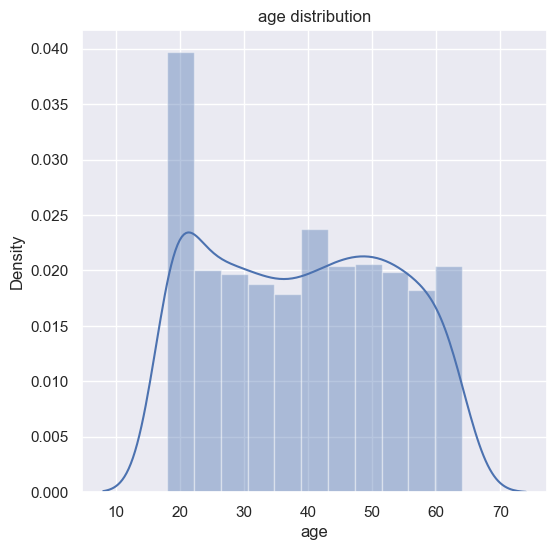

In [149]:
#visulizing the data distribution of age value
sns.set()
plt.figure(figsize= (6, 6))
sns.distplot(df["age"])
plt.title("age distribution")
plt.show()

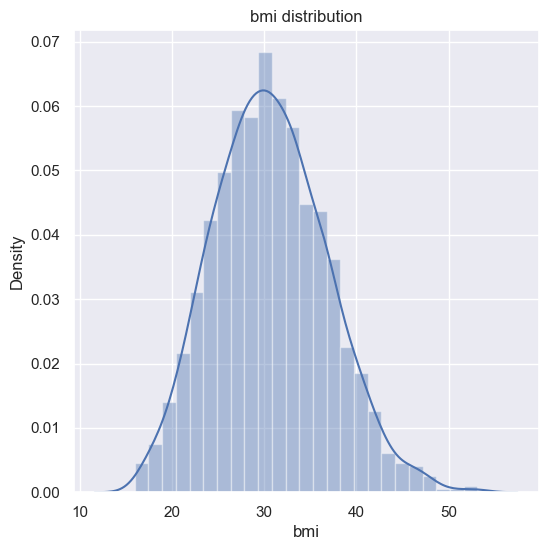

In [150]:
#distribution upon bmi columns
# sns.set()
plt.figure(figsize= (6, 6))
sns.distplot(df["bmi"])
plt.title("bmi distribution")
plt.show()

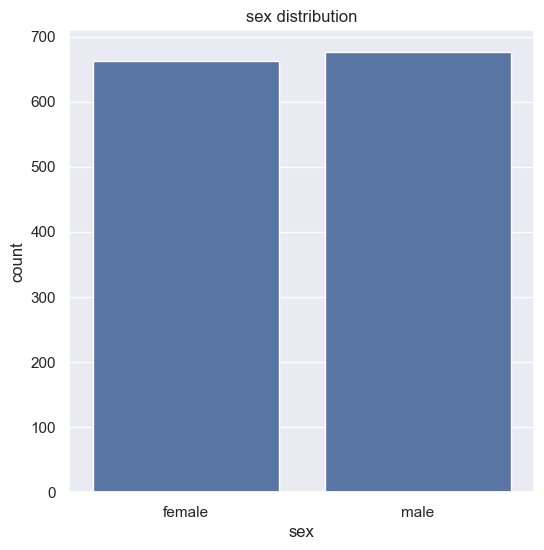

In [153]:
#gender columns
plt.figure(figsize= (6, 6))
sns.countplot(x= "sex", data= df)
plt.title("sex distribution")
plt.show()

In [155]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [157]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

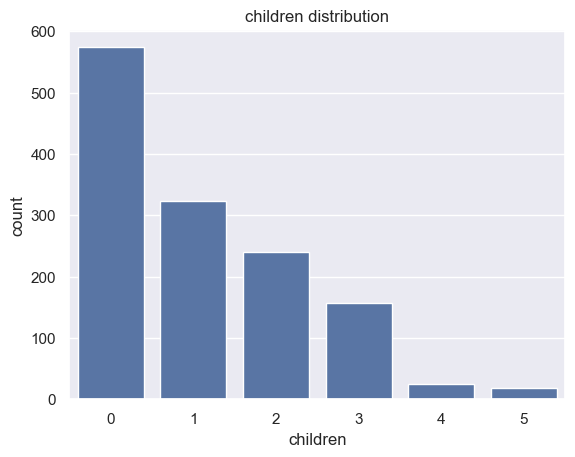

In [159]:
sns.countplot(x= "children", data= df)
plt.title("children distribution")
plt.show()

In [161]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

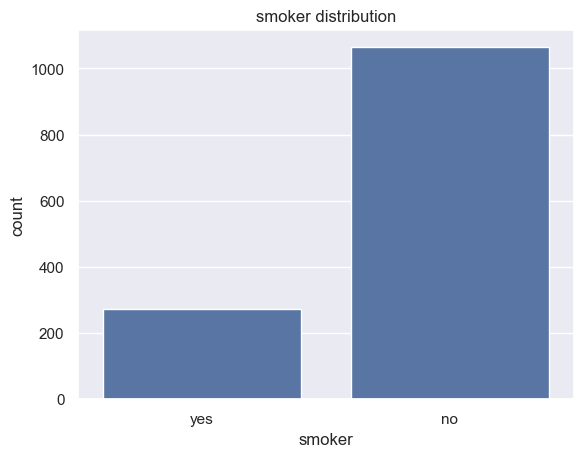

In [163]:
sns.countplot(x= "smoker", data= df)
plt.title("smoker distribution")
plt.show()

In [165]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

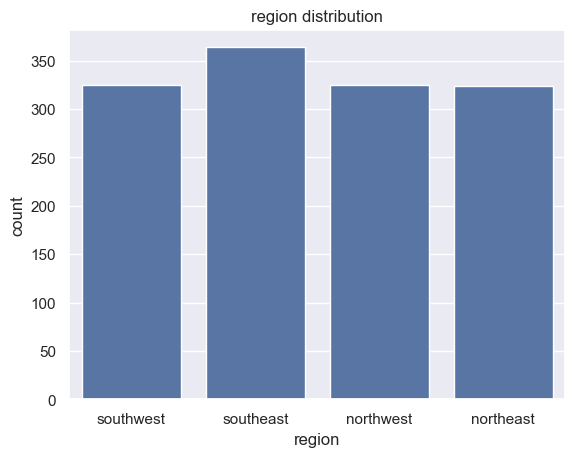

In [167]:
sns.countplot(x= "region", data= df)
plt.title("region distribution")
plt.show()

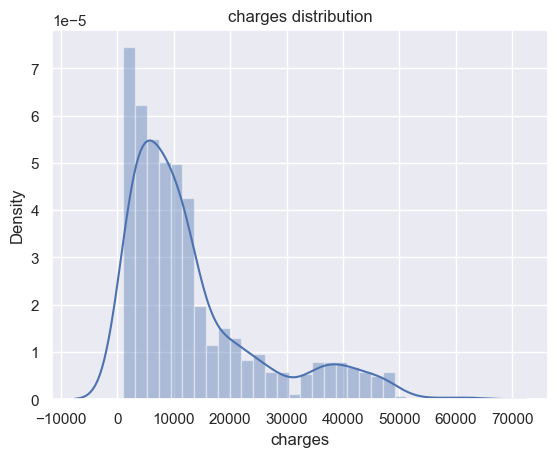

In [169]:
sns.distplot(df["charges"])
plt.title("charges distribution")
plt.show()

In [171]:
#data preprocessing

In [173]:
#label encoding on categorical data
le= LabelEncoder()

columns_to_encode = ["sex", "children", "smoker", "region"]
mappings= {}

for col in columns_to_encode:
    df[col]= le.fit_transform(df[col])
    mappings[col] = dict(enumerate(le.classes_))

for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

sex: {0: 'female', 1: 'male'}
children: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
smoker: {0: 'no', 1: 'yes'}
region: {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}


In [175]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [177]:
#seprate the data x and y
X= df.drop(["charges"], axis=1)
Y= df["charges"]

In [179]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [238]:
#data convert into train, test and split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 25, test_size= 0.2)

In [240]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [242]:
print(X_train)

      age  sex     bmi  children  smoker  region
629    44    0  38.950         0       1       1
556    46    1  33.440         1       0       0
427    18    0  29.165         0       0       0
1047   22    1  52.580         1       1       2
98     56    1  19.950         0       1       0
...   ...  ...     ...       ...     ...     ...
886    57    1  28.975         0       1       0
143    29    1  29.735         2       0       1
474    54    1  25.100         3       1       3
318    44    0  27.645         0       0       1
1156   19    1  44.880         0       1       2

[1070 rows x 6 columns]


In [244]:
#make the model and train the model
lr= LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [246]:
#evaluation

In [248]:
#prediction on train data
train_pred= lr.predict(X_train)

#r2 score on train data
train_score= metrics.r2_score(Y_train, train_pred)
print(train_score)

0.7483825584860884


In [250]:
#prediction on test data
test_pred= lr.predict(X_test)

#r2 score on test data
test_score= metrics.r2_score(Y_test, test_pred)
print(test_score)

0.7575797365475682


In [254]:
#make a prediction model
input= (37,0,27.74,3,0,1)

#convert in to array
input_arr= np.asarray(input)

#reshaped the array
input_reshape= input_arr.reshape(1, -1)

#predict the output
pred= lr.predict(input_reshape)
print(pred)

[8228.78158651]
